In [494]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split

In [495]:
yogesh=os.listdir("C:/Users/Yogesh/Desktop/picture daya/Image-recognition/pewdiepiw/")
ashok=os.listdir("C:/Users/Yogesh/Desktop/picture daya/Image-recognition/jk/")
scarlet=os.listdir("C:/Users/Yogesh/Desktop/picture daya/Image-recognition/jenna/")

In [496]:
limit=10
yogesh_images = [None]*limit
ashok_images = [None]*limit
scarlet_images = [None]*limit
j=0
for i in yogesh:
    if (j<limit):
        yogesh_images[j]= imread("C:/Users/Yogesh/Desktop/picture daya/Image-recognition/pewdiepiw/"+i)
        j+=1
    else:
        break

j=0
for i in ashok:
    if(j<limit):
        ashok_images[j]=imread("C:/Users/Yogesh/Desktop/picture daya/Image-recognition/jk/"+i)
        j+=1
    else:
        break

j=0
for i in scarlet:
    if(j<limit):
        scarlet_images[j]=imread("C:/Users/Yogesh/Desktop/picture daya/Image-recognition/jenna/"+i)
        j+=1
    else:
        break

In [497]:
yogesh_gray=[None]*limit
ashok_gray=[None]*limit
scarlet_gray=[None]*limit
j=0

for i in yogesh:
    if(j<limit):
        yogesh_gray[j]=rgb2gray(yogesh_images[j])
        j+=1
    else:
        break
j=0
for i in ashok:
    if(j<limit):
        ashok_gray[j]=rgb2gray(ashok_images[j])
        j+=1
    else:
        break
    

j=0
for i in scarlet:
    if(j<limit):
        scarlet_gray[j]=rgb2gray(scarlet_images[j])
        j+=1
    else:
        break

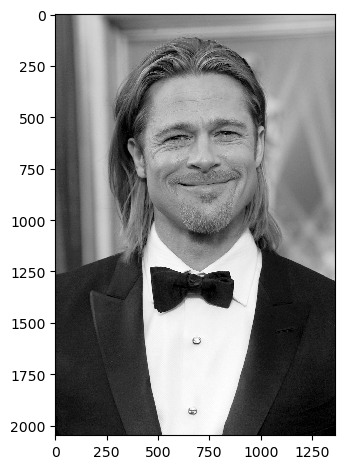

In [498]:
imshow(scarlet_gray[0])

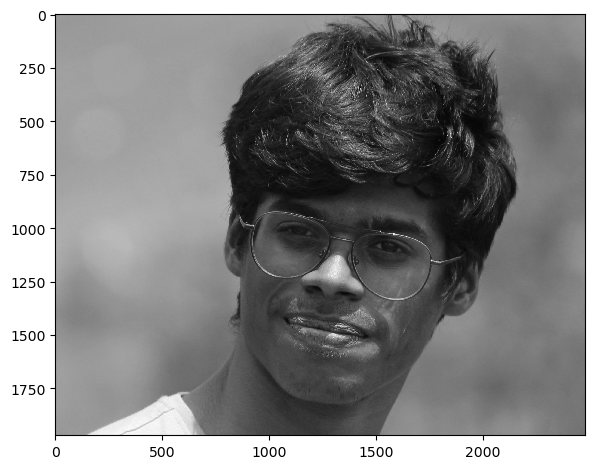

In [499]:
imshow(yogesh_gray[0])

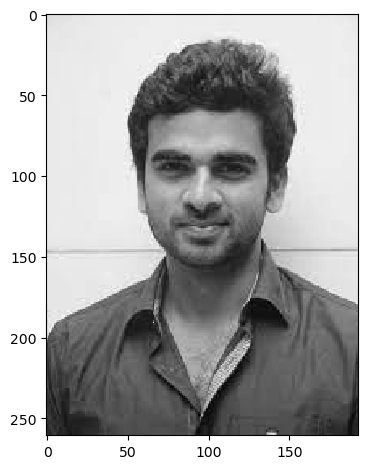

In [500]:
imshow(ashok_gray[0])

In [501]:
scarlet_gray[2].shape

(1235, 800)

In [502]:
for j in range(10):
    scarlet_temp=scarlet_gray[j]
    scarlet_gray[j]=resize(scarlet_temp,(512,512))

In [503]:
for j in range(10):
    yogesh_temp=yogesh_gray[j]
    yogesh_gray[j]=resize(yogesh_temp,(512,512))
for j in range(10):
    ashok_temp=ashok_gray[j]
    ashok_gray[j]=resize(ashok_temp,(512,512))



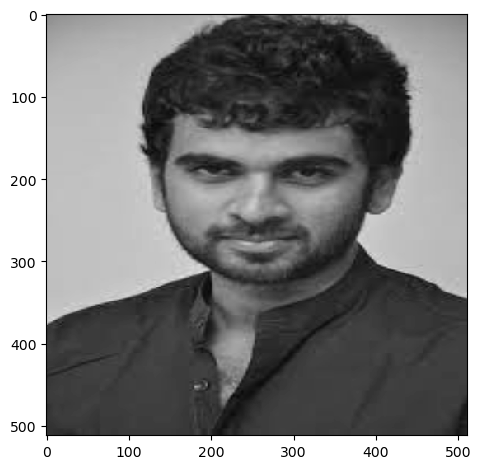

In [504]:
imshow(ashok_gray[2])

In [505]:
len_of_scarlet=len(scarlet_gray)
len_of_ashok=len(ashok_gray)
len_of_yogesh=len(yogesh_gray)


In [506]:
image_size_scarlet=scarlet_gray[1].shape
image_size_yogesh=yogesh_gray[1].shape
image_size_ashok=ashok_gray[1].shape

In [507]:
image_size_scarlet

(512, 512)

In [508]:
flatten_size_scarlet=image_size_scarlet[0]*image_size_scarlet[1]
flatten_size_yogesh=image_size_yogesh[0]*image_size_yogesh[1]
flatten_size_ashok=image_size_ashok[0]*image_size_ashok[1]

In [509]:
flatten_size_scarlet

262144

In [510]:
for i in range(len_of_scarlet):
    scarlet_gray[i]= np.ndarray.flatten(scarlet_gray[i].reshape(flatten_size_scarlet,1))
for i in range(len_of_yogesh):
    yogesh_gray[i]= np.ndarray.flatten(yogesh_gray[i].reshape(flatten_size_yogesh,1))
for i in range(len_of_ashok):
    ashok_gray[i]= np.ndarray.flatten(ashok_gray[i].reshape(flatten_size_ashok,1))

In [511]:
scarlet_gray=np.dstack(scarlet_gray)
yogesh_gray=np.dstack(yogesh_gray)
ashok_gray=np.dstack(ashok_gray)

In [512]:
ashok_gray.shape

(1, 262144, 10)

In [513]:
scarlet_gray=np.rollaxis(scarlet_gray,axis=2,start=0)
yogesh_gray=np.rollaxis(yogesh_gray,axis=2,start=0)
ashok_gray=np.rollaxis(ashok_gray,axis=2,start=0)
ashok_gray.shape



(10, 1, 262144)

In [514]:
yogesh_gray=np.rollaxis(yogesh_gray,axis=2,start=1)
scarlet_gray=np.rollaxis(scarlet_gray,axis=2,start=1)
ashok_gray=np.rollaxis(ashok_gray,axis=2,start=1)

In [515]:
ashok_gray.shape

(10, 262144, 1)

In [516]:
scarlet_gray=scarlet_gray.reshape(len_of_scarlet,flatten_size_scarlet)
yogesh_gray=yogesh_gray.reshape(len_of_yogesh,flatten_size_yogesh)
ashok_gray=ashok_gray.reshape(len_of_ashok,flatten_size_ashok)

In [517]:
yogesh_gray.shape

(10, 262144)

In [518]:
scarlet_data=pd.DataFrame(scarlet_gray)
ashok_data=pd.DataFrame(ashok_gray)
yogesh_data=pd.DataFrame(yogesh_gray)


In [519]:
yogesh_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0.603751,0.603574,0.602113,0.603501,0.602137,0.602381,0.601036,0.597861,0.601871,0.600885,...,0.451756,0.448245,0.448247,0.448599,0.447753,0.445413,0.442945,0.446179,0.441776,0.448494
1,0.772601,0.777407,0.776752,0.779036,0.779980,0.784768,0.785783,0.791449,0.800068,0.804971,...,0.977246,0.985004,0.987769,0.995263,0.997893,0.997938,0.994849,0.988726,0.985861,0.981893
2,0.607218,0.607569,0.609336,0.609364,0.609332,0.609633,0.610599,0.610083,0.608738,0.609297,...,0.571321,0.568390,0.566837,0.566332,0.562686,0.565607,0.559028,0.556104,0.553724,0.547033
3,0.182736,0.186639,0.190433,0.193443,0.193098,0.196491,0.198453,0.199990,0.204510,0.199975,...,0.593692,0.598177,0.598884,0.601306,0.604179,0.605064,0.606313,0.607608,0.609907,0.613436
4,0.570977,0.570977,0.571525,0.572075,0.572085,0.576554,0.577960,0.577968,0.577886,0.577151,...,0.581243,0.579119,0.576502,0.571270,0.568349,0.571509,0.570199,0.562972,0.555151,0.548795
5,0.676791,0.675320,0.673953,0.676438,0.678408,0.680159,0.682046,0.684286,0.684347,0.688089,...,0.237875,0.235182,0.240536,0.242243,0.241586,0.241443,0.239792,0.234788,0.241769,0.243413
6,0.650590,0.650682,0.654655,0.654294,0.652994,0.654988,0.656098,0.656157,0.656071,0.654815,...,0.357090,0.336941,0.320716,0.320141,0.328020,0.336012,0.340794,0.340249,0.343140,0.348576
7,0.430975,0.429301,0.427888,0.428295,0.427370,0.420550,0.417727,0.418402,0.420034,0.417481,...,0.663626,0.662699,0.659091,0.657016,0.656198,0.653296,0.649017,0.647939,0.647505,0.646838
8,0.639232,0.642010,0.642049,0.641970,0.641911,0.643619,0.645422,0.645347,0.651445,0.647458,...,0.593984,0.592567,0.591325,0.587832,0.587138,0.583495,0.581243,0.578470,0.584002,0.579167
9,0.577830,0.575860,0.573587,0.576863,0.577457,0.580298,0.584345,0.593592,0.598430,0.596916,...,0.563038,0.564571,0.557470,0.559324,0.552890,0.552694,0.553331,0.552180,0.546134,0.541220


In [520]:
scarlet_data["label"]="Scarlet"
yogesh_data["label"]="Yogesh"
ashok_data["label"]="Ashok Selvan"


In [521]:
ashok_data

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.860389,0.860389,0.860389,0.860389,0.860935,0.861984,0.863033,0.863486,0.863848,0.864450,...,0.123306,0.135132,0.145200,0.143722,0.142244,0.145854,0.154992,0.164131,0.158165,Ashok Selvan
1,0.682184,0.682112,0.682654,0.683422,0.684718,0.685798,0.685798,0.685860,0.687698,0.689536,...,0.503546,0.474378,0.416129,0.356876,0.361090,0.377997,0.393254,0.407803,0.405863,Ashok Selvan
2,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,0.559176,...,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025,Ashok Selvan
3,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,0.833953,...,0.518864,0.536720,0.578522,0.623760,0.644278,0.657307,0.671564,0.686454,0.684861,Ashok Selvan
4,0.195400,0.195411,0.195333,0.195499,0.196237,0.196807,0.196542,0.196312,0.197104,0.197896,...,0.361263,0.354184,0.296685,0.237449,0.221335,0.213846,0.209577,0.206689,0.207074,Ashok Selvan
5,0.928907,0.928907,0.928907,0.928907,0.928907,0.928907,0.929458,0.931051,0.932644,0.932828,...,0.314459,0.316052,0.317645,0.306739,0.289214,0.270464,0.246567,0.222670,0.233699,Ashok Selvan
6,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.813439,0.814780,0.816266,0.817361,...,0.192257,0.190771,0.187840,0.171599,0.155357,0.146399,0.146031,0.145664,0.145899,Ashok Selvan
7,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,0.369782,...,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470,Ashok Selvan
8,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.694944,0.695652,0.697054,0.698456,...,0.774291,0.774291,0.774291,0.774291,0.774291,0.775268,0.776669,0.778071,0.776953,Ashok Selvan
9,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.105577,0.106285,0.107687,0.109089,...,0.063387,0.067592,0.071797,0.076002,0.080207,0.083435,0.086238,0.089042,0.086805,Ashok Selvan


In [522]:
img_1=pd.concat([scarlet_data,yogesh_data])

In [523]:
img=pd.concat([img_1,ashok_data])

In [524]:
img

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.386983,0.382313,0.384013,0.385864,0.385487,0.385580,0.386872,0.385715,0.382517,0.376247,...,0.010518,0.005540,0.005895,0.020739,0.011279,0.010469,0.010831,0.006012,0.012971,Scarlet
1,0.089709,0.101938,0.117210,0.129268,0.141480,0.157640,0.168817,0.179249,0.191539,0.198794,...,0.169380,0.166748,0.165981,0.176910,0.166496,0.116114,0.064978,0.052788,0.054373,Scarlet
2,0.271730,0.269214,0.268164,0.269851,0.269023,0.259864,0.283960,0.287328,0.286905,0.284808,...,0.198094,0.185853,0.198890,0.224783,0.210355,0.233843,0.208521,0.205027,0.212279,Scarlet
3,0.386983,0.382313,0.384013,0.385864,0.385487,0.385580,0.386872,0.385715,0.382517,0.376247,...,0.010518,0.005540,0.005895,0.020739,0.011279,0.010469,0.010831,0.006012,0.012971,Scarlet
4,0.208313,0.209232,0.208419,0.206052,0.211761,0.209585,0.203277,0.207401,0.202680,0.207994,...,0.091195,0.096296,0.097139,0.087734,0.089177,0.094022,0.097895,0.096546,0.099414,Scarlet
5,0.848480,0.848480,0.848480,0.848480,0.848480,0.848480,0.848480,0.848480,0.848480,0.848480,...,0.113036,0.132775,0.098171,0.105713,0.097828,0.087489,0.068404,0.071605,0.064558,Scarlet
6,0.757880,0.753764,0.758074,0.760091,0.758154,0.754614,0.755898,0.756200,0.760459,0.757584,...,0.009610,0.011841,0.012907,0.012678,0.015609,0.010497,0.009618,0.008289,0.007255,Scarlet
7,0.538751,0.538652,0.536389,0.536526,0.529814,0.529053,0.527470,0.528062,0.533485,0.533970,...,0.080660,0.080394,0.077143,0.083927,0.095017,0.100947,0.111051,0.124198,0.133341,Scarlet
8,0.344800,0.344800,0.346367,0.349346,0.352326,0.355305,0.358285,0.361264,0.364244,0.364408,...,0.309909,0.309909,0.315085,0.319128,0.319128,0.319128,0.319128,0.319128,0.319128,Scarlet
9,0.023362,0.025973,0.028757,0.028490,0.024337,0.021659,0.029125,0.029023,0.025864,0.024631,...,0.071886,0.067440,0.065926,0.063252,0.059907,0.059865,0.059301,0.052793,0.047885,Scarlet


In [525]:
from sklearn.utils import shuffle

In [526]:
img_shuffle = shuffle(img).reset_index()

In [527]:
img_shuffle

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,4,0.570977,0.570977,0.571525,0.572075,0.572085,0.576554,0.577960,0.577968,0.577886,...,0.579119,0.576502,0.571270,0.568349,0.571509,0.570199,0.562972,0.555151,0.548795,Yogesh
1,9,0.577830,0.575860,0.573587,0.576863,0.577457,0.580298,0.584345,0.593592,0.598430,...,0.564571,0.557470,0.559324,0.552890,0.552694,0.553331,0.552180,0.546134,0.541220,Yogesh
2,2,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,...,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025,Ashok Selvan
3,0,0.386983,0.382313,0.384013,0.385864,0.385487,0.385580,0.386872,0.385715,0.382517,...,0.010518,0.005540,0.005895,0.020739,0.011279,0.010469,0.010831,0.006012,0.012971,Scarlet
4,3,0.386983,0.382313,0.384013,0.385864,0.385487,0.385580,0.386872,0.385715,0.382517,...,0.010518,0.005540,0.005895,0.020739,0.011279,0.010469,0.010831,0.006012,0.012971,Scarlet
5,7,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,...,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470,Ashok Selvan
6,6,0.757880,0.753764,0.758074,0.760091,0.758154,0.754614,0.755898,0.756200,0.760459,...,0.009610,0.011841,0.012907,0.012678,0.015609,0.010497,0.009618,0.008289,0.007255,Scarlet
7,1,0.089709,0.101938,0.117210,0.129268,0.141480,0.157640,0.168817,0.179249,0.191539,...,0.169380,0.166748,0.165981,0.176910,0.166496,0.116114,0.064978,0.052788,0.054373,Scarlet
8,4,0.208313,0.209232,0.208419,0.206052,0.211761,0.209585,0.203277,0.207401,0.202680,...,0.091195,0.096296,0.097139,0.087734,0.089177,0.094022,0.097895,0.096546,0.099414,Scarlet
9,0,0.603751,0.603574,0.602113,0.603501,0.602137,0.602381,0.601036,0.597861,0.601871,...,0.448245,0.448247,0.448599,0.447753,0.445413,0.442945,0.446179,0.441776,0.448494,Yogesh


In [528]:
img_shuffle=img_shuffle.drop(['index'],axis=1)

In [529]:
img_shuffle

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.570977,0.570977,0.571525,0.572075,0.572085,0.576554,0.577960,0.577968,0.577886,0.577151,...,0.579119,0.576502,0.571270,0.568349,0.571509,0.570199,0.562972,0.555151,0.548795,Yogesh
1,0.577830,0.575860,0.573587,0.576863,0.577457,0.580298,0.584345,0.593592,0.598430,0.596916,...,0.564571,0.557470,0.559324,0.552890,0.552694,0.553331,0.552180,0.546134,0.541220,Yogesh
2,0.548413,0.547620,0.548717,0.549814,0.551053,0.552493,0.553933,0.555610,0.557393,0.559176,...,0.114308,0.118628,0.123392,0.129152,0.134912,0.140672,0.146431,0.152191,0.148025,Ashok Selvan
3,0.386983,0.382313,0.384013,0.385864,0.385487,0.385580,0.386872,0.385715,0.382517,0.376247,...,0.010518,0.005540,0.005895,0.020739,0.011279,0.010469,0.010831,0.006012,0.012971,Scarlet
4,0.386983,0.382313,0.384013,0.385864,0.385487,0.385580,0.386872,0.385715,0.382517,0.376247,...,0.010518,0.005540,0.005895,0.020739,0.011279,0.010469,0.010831,0.006012,0.012971,Scarlet
5,0.362870,0.362650,0.363034,0.363418,0.363905,0.364448,0.365062,0.366645,0.368228,0.369782,...,0.103641,0.102885,0.102129,0.103857,0.105765,0.108492,0.112681,0.116870,0.114470,Ashok Selvan
6,0.757880,0.753764,0.758074,0.760091,0.758154,0.754614,0.755898,0.756200,0.760459,0.757584,...,0.009610,0.011841,0.012907,0.012678,0.015609,0.010497,0.009618,0.008289,0.007255,Scarlet
7,0.089709,0.101938,0.117210,0.129268,0.141480,0.157640,0.168817,0.179249,0.191539,0.198794,...,0.169380,0.166748,0.165981,0.176910,0.166496,0.116114,0.064978,0.052788,0.054373,Scarlet
8,0.208313,0.209232,0.208419,0.206052,0.211761,0.209585,0.203277,0.207401,0.202680,0.207994,...,0.091195,0.096296,0.097139,0.087734,0.089177,0.094022,0.097895,0.096546,0.099414,Scarlet
9,0.603751,0.603574,0.602113,0.603501,0.602137,0.602381,0.601036,0.597861,0.601871,0.600885,...,0.448245,0.448247,0.448599,0.447753,0.445413,0.442945,0.446179,0.441776,0.448494,Yogesh


In [530]:
img_shuffle.shape

(30, 262145)

In [531]:
x = img_shuffle.values[:,:-1]

In [532]:
y= img_shuffle.values[:,-1]

In [533]:
x

array([[0.5709772818726802, 0.5709772818726802, 0.5715248324889795, ...,
        0.5629719099713861, 0.5551506860885452, 0.5487951494287984],
       [0.5778298108230002, 0.5758601989376337, 0.5735874152769662, ...,
        0.55218049372088, 0.5461338173996273, 0.5412202716747873],
       [0.5484133091107536, 0.5476198520795037, 0.5487166897403493, ...,
        0.14643144607843137, 0.15219125, 0.14802458333333335],
       ...,
       [0.023361951786451663, 0.02597328530511915, 0.02875733358920815,
        ..., 0.0593006926072389, 0.05279326377105583,
        0.04788472873438129],
       [0.8134392156862745, 0.8134392156862745, 0.8134392156862744, ...,
        0.14603148208917355, 0.14566435861624924, 0.14589901485667509],
       [0.8603886274509804, 0.8603886274509803, 0.8603886274509803, ...,
        0.1549922514014151, 0.16413060451731964, 0.15816463305305034]],
      dtype=object)

In [534]:
y

array(['Yogesh', 'Yogesh', 'Ashok Selvan', 'Scarlet', 'Scarlet',
       'Ashok Selvan', 'Scarlet', 'Scarlet', 'Scarlet', 'Yogesh',
       'Scarlet', 'Yogesh', 'Yogesh', 'Ashok Selvan', 'Yogesh', 'Scarlet',
       'Scarlet', 'Ashok Selvan', 'Ashok Selvan', 'Ashok Selvan',
       'Scarlet', 'Ashok Selvan', 'Yogesh', 'Ashok Selvan', 'Yogesh',
       'Yogesh', 'Yogesh', 'Scarlet', 'Ashok Selvan', 'Ashok Selvan'],
      dtype=object)

In [535]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [536]:
from sklearn import svm

In [537]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [538]:
y_pred=clf.predict(x_test)

In [539]:
y_pred

array(['Ashok Selvan', 'Ashok Selvan', 'Ashok Selvan', 'Scarlet',
       'Yogesh', 'Yogesh', 'Scarlet', 'Yogesh'], dtype=object)

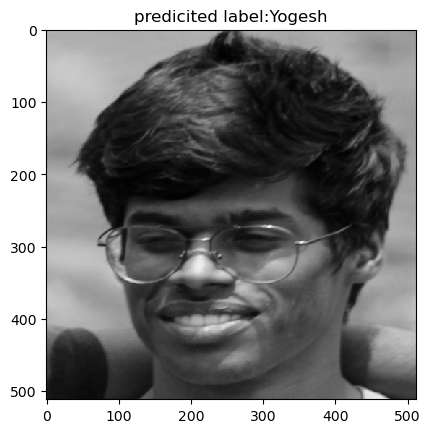

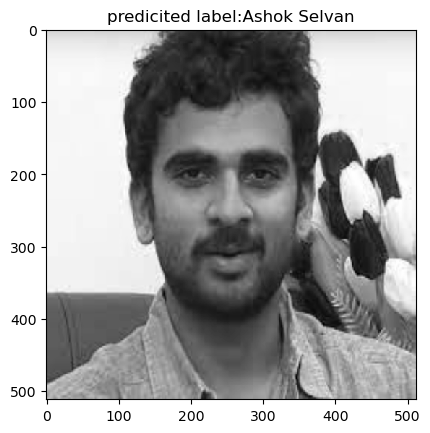

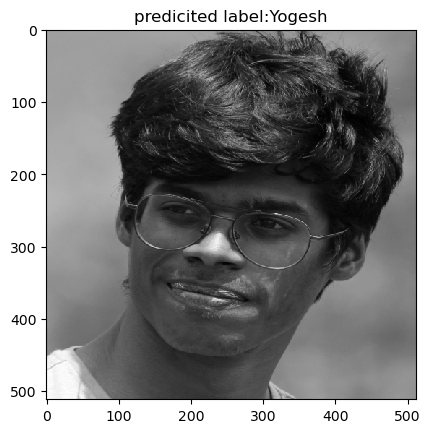

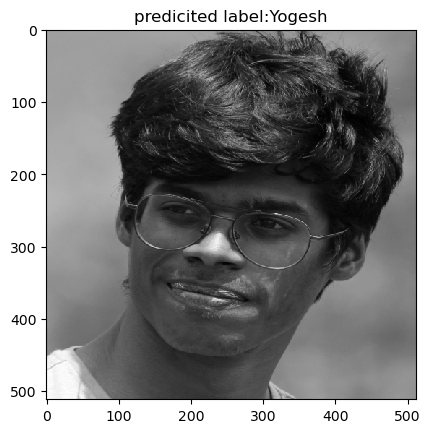

In [540]:
for i in (np.random.randint(0,6,4)):
    predicted_images = (np.reshape(x_test[i],(512,512)).astype(np.float64))
    plt.title('predicited label:{0}'.format(y_pred[i]))
    plt.imshow(predicted_images,interpolation='nearest',cmap='gray')
    plt.show()

In [541]:
from sklearn import metrics

In [542]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [543]:
accuracy

1.0

In [392]:
from sklearn.metrics import confusion_matrix

In [393]:
confusion_matrix(y_test,y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 0, 2]], dtype=int64)